# Шпаргалка по визуализации данных в Python с помощью Plotly

In [1]:
# подгрузим необходимые библиотеки
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

In [2]:
# для отображение графиков на гитхабе (предварительно устанавливаются psutil и plotly-orca)
# закоментить эти строки для отображения интерактивных графиков
import plotly.io as pio
pio.renderers.default = "svg"

## Линейный график

Сперва поступим совсем просто и «в лоб»:

- Создадим график с помощью функции scatter из подмодуля plotly.express (внутрь передадим 2 списка точек: координаты X и Y)
- Тут же «покажем» его с помощью метода show()

График интерактивный, если навести на него курсор, то можно его приближать и удалять, выделять участки, по наведению курсора на точку получать подробную информацию, возвращать картинку в исходное положение, а при необходимости «скриншотить» и сохранять как файл.

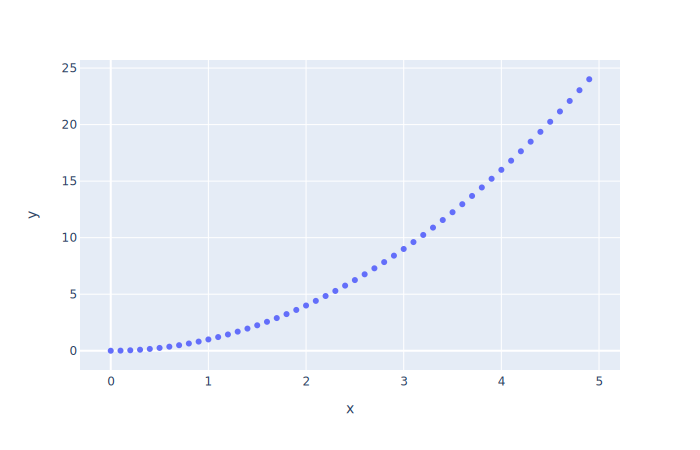

In [3]:
x = np.arange(0, 5, 0.1)

def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()

Более читабельно и правильно записать тот же в код в следующем виде:

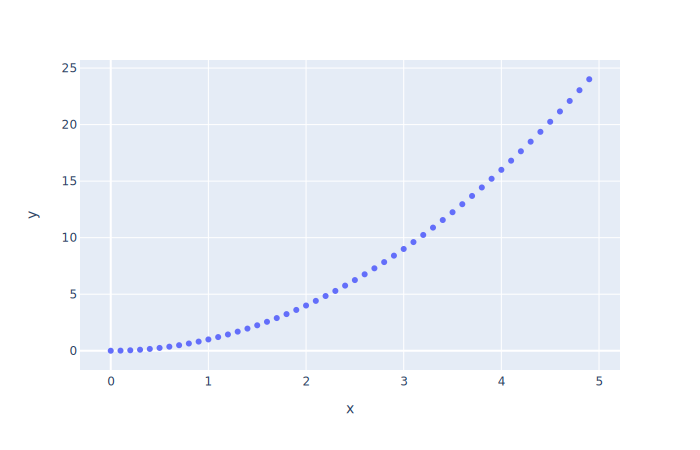

In [4]:
fig = px.scatter(x=x, y=f(x))
fig.show()

- Создаём фигуру
- Рисуем график
- Показываем фигуру

2 строчки и готовый результат. Т.к. мы используем Express. Быстро и просто.

Но маловато гибкости, поэтому мы практически сразу переходим к более продвинутому уровню — сразу создадим фигуру и нанесём на неё объекты.

Так же сразу выведем фигуру для показа с помощью метода show().

В отличие от Matplotlib отдельные объекты осей не создаются, хотя мы с ними ещё столкнёмся, когда захотим построить несколько графиков вместе

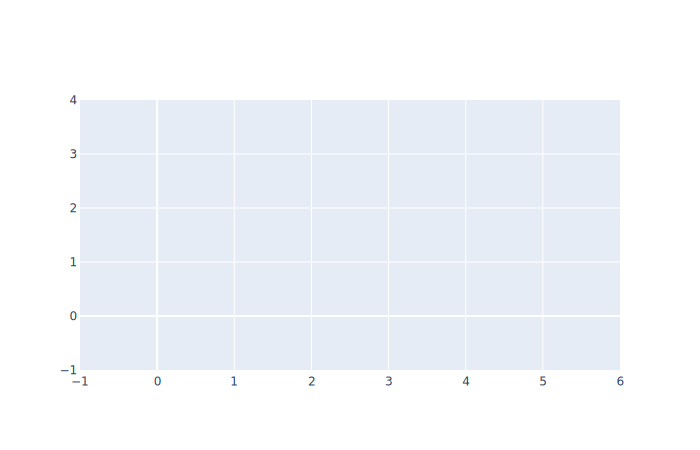

In [5]:
fig = go.Figure()
# здесь будет код
fig.show()

Чтобы добавить что на график нам понадобится метод фигуры add_trace.

In [6]:
#fig.add_trace(ТУТ_ТО_ЧТО_ХОТИМ_ПЕРЕДАТЬ_ДЛЯ_ОТОБРАЖЕНИЯ_И_ГДЕ)

Но ЧТО мы хотим нарисовать? График по точкам. График мы уже рисовали с помощью Scatter в Экспрессе, у Объектов есть свой Scatter, давайте глянем что он делает:

In [7]:
go.Scatter(x=x, y=f(x))

Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

Вычислили все координаты. Теперь объединим:

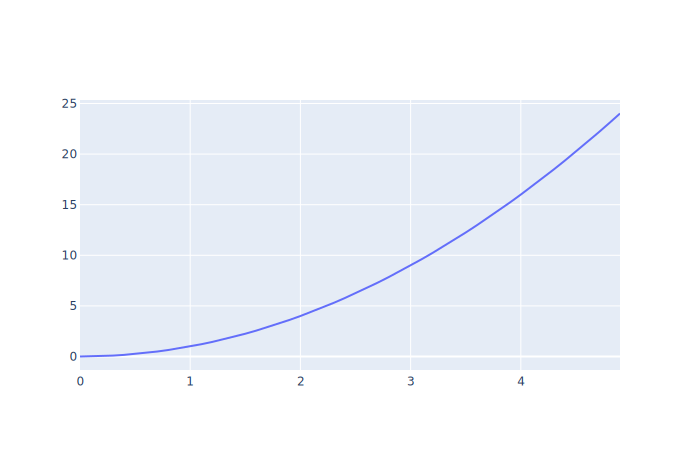

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()

Как видим, отличия не только в коде, но и в результате — получилась гладкая кривая.

Кроме того, такой способ позволит нам нанести на график столько кривых, сколько мы хотим:

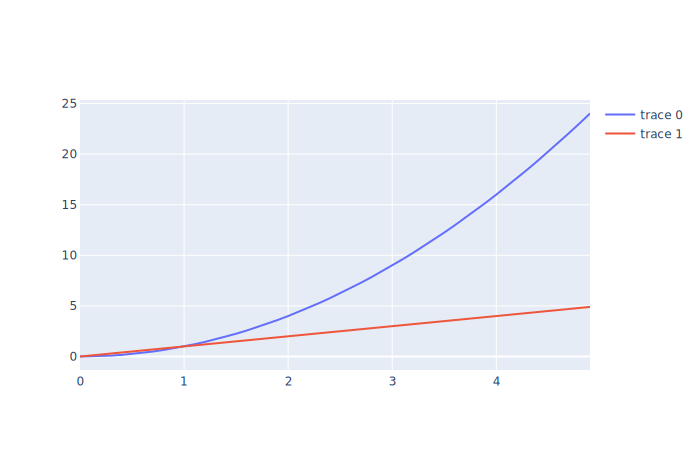

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show()

Погодите, что это такое? Справа появилась ещё и легенда!

Впрочем, логично, пока график был один, зачем нам легенда?

Но магия Plotly тут не заканчивается. Нажмите на любую из подписей в легенде и соответствующий график исчезнет, а надпись станет более бледной. Вернуть их позволит повторный клик.

### Подписи графиков

Добавим атрибут name, в который передадим строку с именем графика, которое мы хотим отображать в легенде.

Plotly поддерживает LATEX в подписях (аналогично matplotlib через использование $$ с обеих сторон).

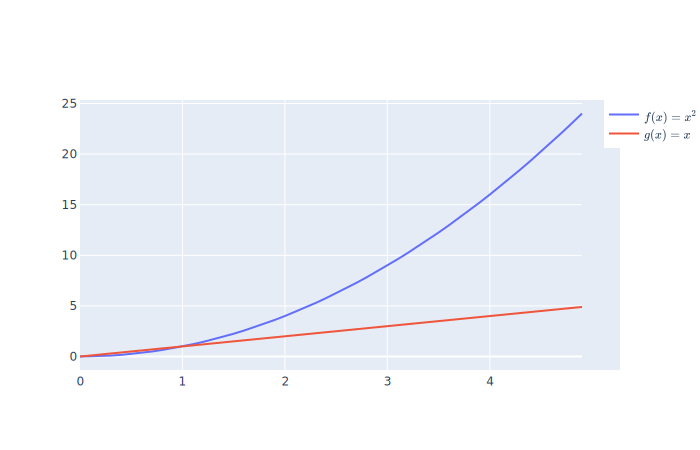

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в «сыром» виде, а не в LATEX.

Победить это можно, если использовать HTML разметку в подписях. В данном примере я буду использовать тег sup. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.

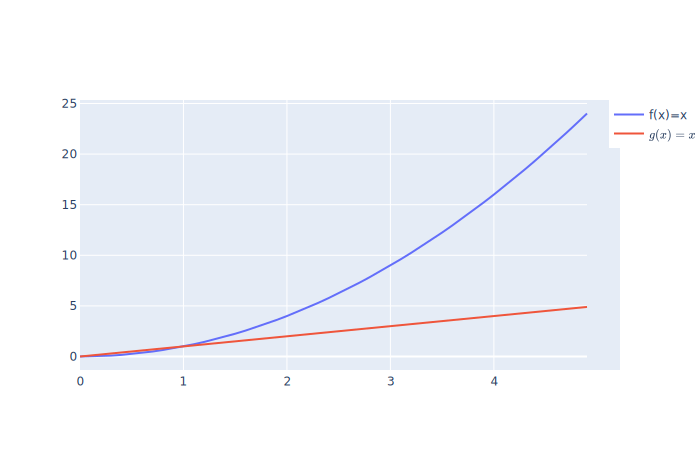

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

С увеличением длины подписи графика, легенда начала наезжать на график. Мне это не нравится, поэтому перенесём легенду вниз.

Для этого применим к фигуре метод update_layout, у которого нас интересует атрибут legend_orientation fig.update_layout(legend_orientation="h")

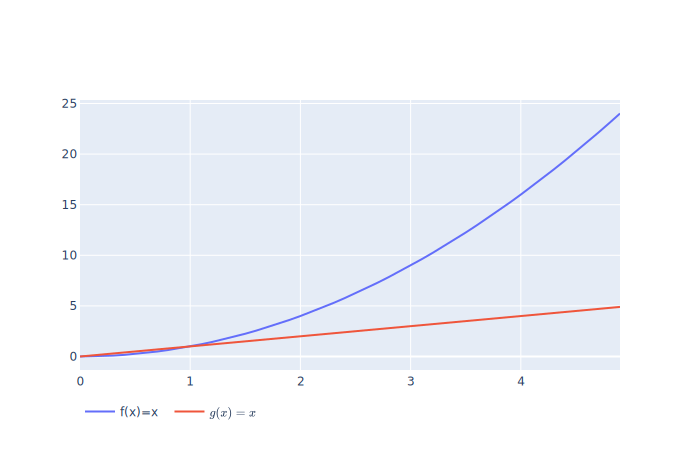

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation='h')
fig.show()

Хорошо, но слишком большая часть рабочего пространства ноутбука не используется. Особенно это заметно сверху — большой отступ сверху до поля графика.

По умолчанию поля графика имеют отступ 20 пикселей. Мы можем задать свои значения отступам с помощью update_layout, у которого есть атрибут margin, принимающий словарь из отступов:
- l — отступ слева
- r — отступ справа
- t — отступ сверху
- b — отступ снизу

Зададим везде нулевые отступы fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

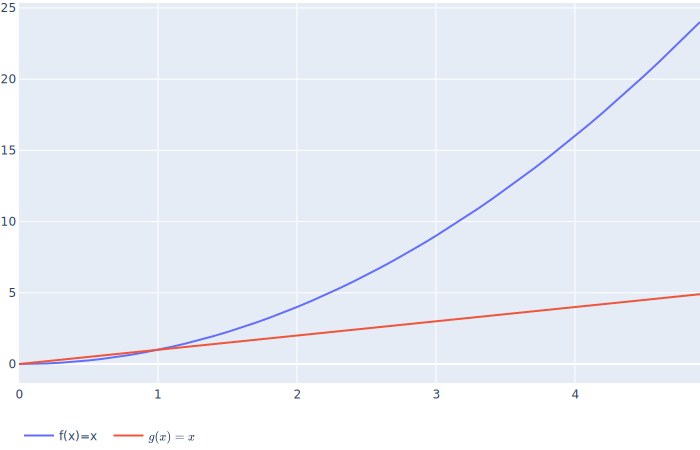

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Поскольку подписи в легенде короткие, мне не нравится, что они расположены слева. Я бы предпочёл выровнять их по центру.

Для этого можно использовать у update_layout атрибут legend, куда передать словарь с координатами для сдвига (сдвиг может быть и по вертикали, но мы используем только горизонталь).

Сдвиг задаётся в долях от ширины всей фигуры, но важно помнить, что сдвигается левый край легенды. Т.е. если мы укажем 0.5 (50% ширины), то надпись будет на самом деле чуть сдвинута вправо.

Т.к. реальная ширина зависит от особенностей вашего экрана, браузера, шрифтов и т.п., то этот параметр часто приходится подгонять. Лично у меня для этого примера неплохо работает 0.43.

Чтобы не шаманить с шириной, можно легенду относительно точки сдвига с помощью аргумента xanchor.

В итоге для легенды мы получим такой словарь:

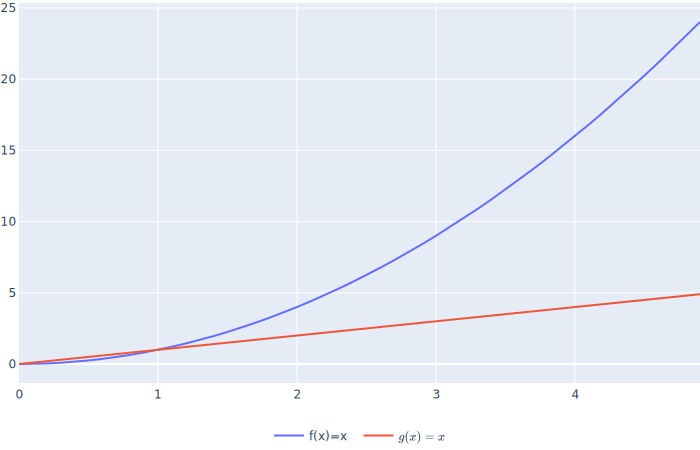

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Стоит сразу задать подписи к осям и графику в целом. Для этого нам вновь понадобится update_layout, у которого добавится 3 новых аргумента:

title="Plot Title",

xaxis_title="x Axis Title",

yaxis_title="y Axis Title",

Следует заметить, что сдвиги, которые мы задали ранее могут негавтивно сказаться на читаемости подписей (так заголовок графика вообще вытесняется из области видимости, поэтому я увеличу отступ сверху с 0 до 30 пикселей

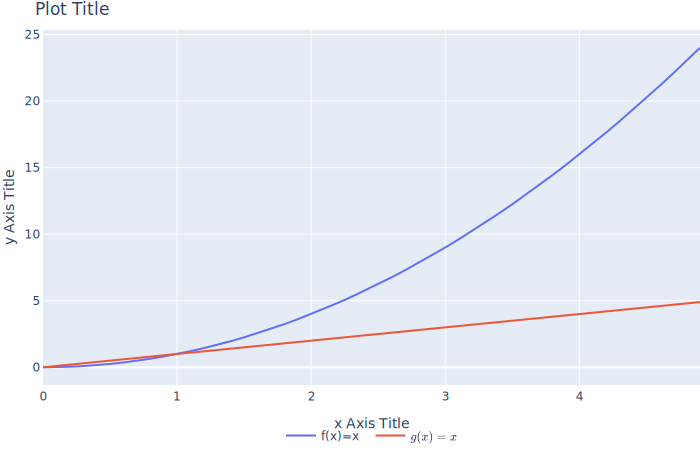

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation='h',
                  legend=dict(x=.5, xanchor='center'),
                  title='Plot Title',
                  xaxis_title='x Axis Title',
                  yaxis_title='y Axis Title',
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Вернёмся к самим графикам, и вспомним, что они состоят из точек. Выделим их с помощью атрибута mode у самих объектов Scatter.

Используем разные варианты выделения для демонстрации:

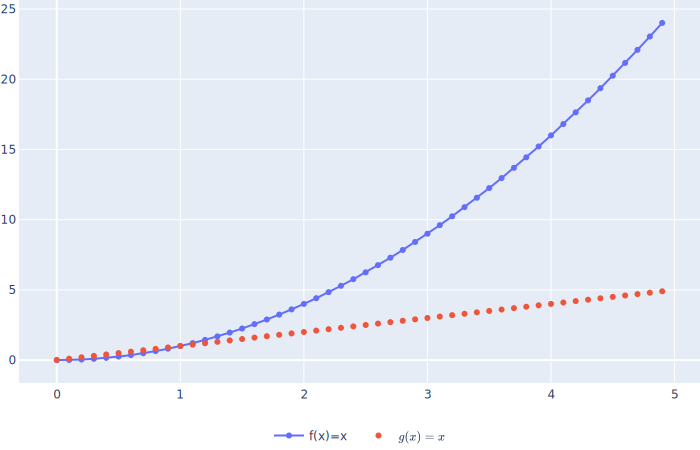

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

Теперь особенно заметно, что LATEX в функции g(x)=x отображается некорректно при наведении курсора мыши на точки.

Давайте скроем эту информацию.

Зададим для всех графиков с помощью метода update_traces поведение при наведении. Это регулирует атрибут hoverinfo, в который передаётся маска из имён атрибутов, например, «x+y» — это только информация о значениях аргумента и функции:

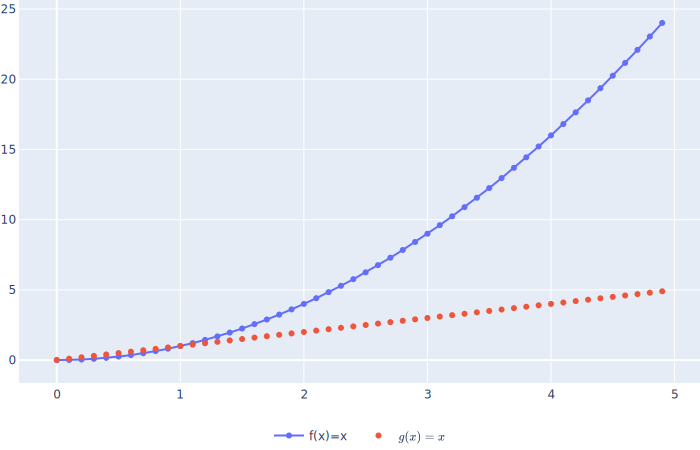

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="x+y")
fig.show()

Давайте разрешим использовать информацию из всех аргументов и сами зададим шаблон подсказки.

hoverinfo=«all»

в hovertemplate передаём строку, используем HTML для форматирования, а имена переменных берём в фигурные скобки и выделяем %, например, %{x}

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

А что если мы хотим сравнить информацию на 2 кривых в точках, например, с одинаковых аргументом?

Т.к. это касается всей фигуры, нам нужен update_layout и его аргумент hovermode.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Кстати, маркерами можно управлять для конкретной кривой и явно.

Для этого используется аргумент marker, который принимает на вход словарь.

А мы лишь ограничимся баловством:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Кажется теперь на графике плохо видно ту часть, где кривые пересекаются (вероятно наиболее интересную для нас).

Для этого у нас есть методы фигуры:

update_yaxes — ось Y (вертикаль)
update_xaxes — ось X (горизонталь)

С их помощью зададим интервалы отображения для осей (это только начальное положение, ничто не мешает нам сменить масштаб в процессе взаимодействия с графиком).

In [ ]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Хорошо, но правильно было бы нанести осевые линии.

Для этого у тех же функций есть 3 атрибута:

zeroline — выводить или нет осевую линию
zerolinewidth — задаёт толщину осевой (в пикселях)
zerolinecolor — задаёт цвет осевой (строка, можно указать название цвета, можно его код, как принято в HTML-разметке)

In [ ]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Давайте добавим больше разных функций на наш график, но сделаем так, чтобы по умолчанию их не было видно.

Для этого у объекта Scatter есть специальный атрибут:

visible='legendonly'

Т.к. мы центрировали легенду относительно точки сдвига, то нам не пришлось менять величину сдвига с увеличением числа подписей.

In [ ]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)


fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Наверное всё же не следует смешивать вместе тригонометрические и арифметические функции. Давайте отобразим их на разных, соседних графиках.

Для этого нам потребуется создать фигуру с несколькими осями.

Фигура с несколькими графиками создаётся с помощью подмодуля make_subplots.

Необходимо указать количество:

row — строк
col — столбцов

А при построении графика передать «координаты» графика в этой «матрице» (сперва строка, потом столбец)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Заметили, наши изменения осей применились к обоим графикам?

Естественно, если у метода, изменяющего оси указать аргументы:

row — координата строки
col — координата столбца

то можно изменить ось только на конкретном графике:

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

А вот если бездумно использовать title, xaxis_title и yaxis_title для update_layout, то может выйти казус — подписи применятся только к 1 графику:

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.update_layout(title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title")
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Поэтому заголовки графиков можно задать, при создании фигуры, передав в аргумент subplot_titles кортеж/список с названиями.

Подписи осей под графиками можно поменять с помощью методов фигуры:

fig.update_xaxes
fig.update_yaxes

Передавая в них номер строки и колонки (т.е. «координаты изменяемого графика»)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Plot 1", "Plot 2"))

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.update_layout(title="Plot Title")
fig.update_xaxes(title='Ось X графика 1', col=1, row=1)
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

И конечно, если необходимо сделать так, чтобы один график был больше, а другой меньше, то для этого используется аргументы

column_widths — задаёт отношения ширины графиков (в одной строке)
row_heights — задаёт отношения высот графиков (в одном столбце)

Каждый из этих параметров принимает список чисел, которых должно быть столько, сколько графиков в строке/столбце. Отношения чисел задают отношения ширин или высот.

Рассмотрим на примере ширин. Сделаем левый график вдвое шире правого, т.е. зададим соотношение 2:1.

In [ ]:
fig = make_subplots(rows=1, cols=2, column_widths=[2, 1])

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

А что если мы хотим выделить одному из графиков больше места, чем другим, например, 2 строки или наоборот, 2 столбца?

В matplotlib мы использовали бы несколько фигур, либо оси с заданными размерами, здесь у нас есть другой инструмент. Мы можем сказать каким-то осям объединиться вдоль колонок или вдоль строк.

Для этого нам потребуется написать спецификацию на фигуру (для начала очень простую).

Спецификация — это список (если точнее, то даже матрица из списков), каждый объект внутри которого — словарь, описывающий одни из осей.

Если каких-то осей нет (например, если их место занимают растянувшиеся соседи, то вместо словаря передаётся None.

Давайте сделаем матрицу 2х2 и объединим вместе левые графики, получив одни высокие вертикальные оси. Для этого первому графику передадим атрибут «rowspan» равный 2, а его нижнего соседа уничтожим (None):

specs=[
[{"rowspan": 2}, {}],
[None, {}]
]

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"rowspan": 2}, {}], [None, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Как видим, в вертикальный график идеально вписался тангенс, который отныне не невидим.

Для объединения используется:

rowspan — по вертикали
colspan — по горизонтали

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"colspan": 2}, None], [{}, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 2, 1)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Последний вариант получился слишком узким по вертикали.

Высоту легко увеличить в помощью атрибута height у метода update_layout.

Размеры фигуры регулируются 2 атрибутами:

width — ширина (в пикселях)
height — высота (в пикселях)

Но следует помнить, если вы встраиваете фигуры plotly куда-то (а это логично, если вы делаете дашборд, например), то фигура занимает всё отведённое пространство по ширине, поэтому не изменять ширину в plotly будет не лучшей идеей. Лучше использовать стили в разметке.

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"colspan": 2}, None], [{}, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 2, 1)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0),
                  height=1000,
                  width=900)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

## Увеличиваем плотность информации

### Тепловая карта

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"))
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

В предыдущем примере цветовая шкала не очень похожа на тепловую карту.

На самом деле цвета на шкале можно изменить, для этого служит атрибут colorscale, в который передаётся имя палитры.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno')
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Можно ли добавить больше информации? Конечно можно, но тут возникают хитрости.

Для ещё одного измерения можно использовать размер маркеров.

Важно. Размер — задаётся в пикселях, т.е. величина не отрицательная (в отличие от цвета), поэтому мы будем использовать модуль одной из функций.

так же, величины меньше 2 пикселей обычно плохо видны на экране, поэтому для размера мы добавим множитель.

Размеры задаётся атрибутом size того же словаря внутри marker. Этот атрибут принимает 1 значение (число), либо список (чисел).

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"), 
                                     colorscale='Inferno',
                                     size=50*abs(h(x)))
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=abs(h(x)),  name='h_mod(x)=|sin(x)|'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

### Анимация

Можно ли ещё уплотнить информацию на графике? Да, можно, если использовать «четвёртое измерение» — время. Это так же может быть полезно и само по себе для оживленя вашего графика.

Вернёмся на пару шагов назад. Мы будем анимировать график построения параболы. Для этого нам понадобятся:

Начальное состояние
Кнопки (анимация не должна начинаться сама по себе, поэтому для начала мы создадим простую кнопку, её запускающую, а постепенно перейдём к временной шкале)
Фреймы (или кадры) — промежуточные состояния

In [ ]:
fig = go.Figure()
# добавляем стартовую точку
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x<sup>2</sup>'))

# добавим фреймы
frames = []
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))
fig.frames = frames


# добавляем настройки слоя и кнопку
fig.update_layout(legend_orientation='h',
                  legend=dict(x=.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0),
                  updatemenus=[dict(type='buttons', buttons=[dict(label='Play', method='animate', args=[None])])])
fig.update_traces(hoverinfo='all', hovertemplate='Аргумент: %{x}<br>Функция: %{y}')
fig.show()

Другой способ задать начальное состояние, слой (с кнопками) и фреймы — сразу передать всё в объект go.Figure:

data — атрибут для графика с начальным состоянием

layout — описание «декораций» включая кнопки

frames — фреймы (кадры) анимации

In [ ]:
frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))
    
    
fig = go.Figure(data=go.Scatter(x=[x[0]], y=[f(x[0])], mode='lines+markers',  name='f(x)=x<sup>2</sup>'),
                frames=frames,
                layout=dict(legend_orientation="h",
                            legend=dict(x=.5, xanchor="center"),
                            updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                            margin=dict(l=0, r=0, t=0, b=0)))

fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Естественно, если добавить на графики (как на начальный, так и те, что во фреймах) маркеры с указанием цвета, цветовой шкалы и размера, то анимация будет более сложного графика.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>',
                         marker=dict(color=h(x[0]), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno', size=50*abs(h(x[0])))
                        ))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]), marker=dict(color=h(x[:i+1]), size=50*abs(h(x[:i+1]))))]))

fig.frames = frames   

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Если мы хотим добавить кнопку «пауза» (в отличие от стандартной паузы повторное нажатие не будет вызывать воспроизведение, для начала воспроизведения придётся нажат Play), код усложнится:

In [ ]:
frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))
    
    
fig = go.Figure(data=go.Scatter(x=[x[0]], y=[f(x[0])], mode='lines+markers',  name='f(x)=x<sup>2</sup>'),
                frames=frames,
                layout=dict(legend_orientation="h",
                            legend=dict(x=.5, xanchor="center"),
                            updatemenus=[dict(type="buttons", buttons=[dict(label="►", 
                                                                            method="animate", 
                                                                            args=[None, {"fromcurrent": True}]),
                                         dict(label="❚❚", method="animate", args=[[None], 
                                                                                  {"frame": {"duration": 0, "redraw": False},
                                                                                   "mode": "immediate",
                                                                                   "transition": {"duration": 0}}])])],
                            margin=dict(l=0, r=0, t=0, b=0)))

fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Иногда полезно перенести кнопки в другоме место. Рассмотрим некоторые из атрибутов, которые с этим помогут:

direction — направление расположения кнопок (по умолчанию сверху-вниз, но если указать «left», то будет слева-направо)
x, y — положение (в долях от фигуры)
xanchor, yanchor — как выравнивать кнопки. У нас была раньше проблема с выравниванием легенд, тут та же история. Если хотим выровнять по центру, то x=0.5 и xanchor=«center» помогут.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>',
                         marker=dict(color=h(x[0]), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno', size=50*abs(h(x[0])))
                        ))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]), marker=dict(color=h(x[:i+1]), size=50*abs(h(x[:i+1]))))]))

fig.frames = frames   

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(direction="left", x=0.5, xanchor="center", y=0,
                                    type="buttons", buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                                               "mode": "immediate",
                                                                                                               "transition": {"duration": 0}}])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

## Слайдер

Слайдер по принципу работы похож на анимацию, но есть серьёзное отличие.

Слайдер — это элемент навигации, полоска по которой скользит ползунок, который управляет состоянием графиков на фигуре.

Т.е. если фреймы в анимации меняются один за другим, то в случае использования слайдера все графики одновременно есть. Но большая часть из них невидима. И при перемещении ползунка мы просто какие-то скрываем, а другие наоборот показываем (и перестраиваем оси, конечно).

**1. Создаём список графиков. Важно, что один из графиков (например, 1й) должен быть видимым.**

Для установления видимости/невидимости используется аргумент visible:

Видимый график — go.Scatter(visible=True, x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x2')

Невидимый график — go.Scatter(visible=False, x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x2')

**Все графики рисуем на фигуре** — для этого удобно использовать аргумент data фигуры, чтобы передать их все списком:

fig = go.Figure(data=trace_list)

**2. Создаём список «шагов» слайдера.**

Шаг имеет определённый синтаксис. По сути он описывает состояние (какие графики видимы, какие нет) и метод перехода к нему.

Шаг должен описывать состояние **всех графиков**.

Минимальный синтаксис 1 шага:

dict(
method = 'restyle',
args = #СПИСОК СОСТОЯНИЙ ВСЕХ ГРАФИКОВ
)

Состояние видимости/невидимости задаётся парой 'visible' и списка логических значений (какие графики 'visible', а какие нет). Поэтому для КАЖДОГО шага мы создадим список False, а потом поменяем нужное значение на True, чтобы показать какой-то конкретный график.

Шаги нужно собрать в список (т.е. это будет список словарей).

Наконец все шаги надо добавить в фигуру:

fig.layout.sliders = sliders

Минимально рабочий код (внимательно изучите его, т.к. там есть несколько тонких моментов):


In [ ]:
num_steps = len(x)
trace_list = [go.Scatter(visible=True, x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x<sup>2</sup>')]

for i in range(1, len(x)):
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=f(x[:i+1]), mode='lines+markers', name='f(x)=x<sup>2</sup>'))

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    # Hide all traces
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    # Enable trace we want to see
    step['args'][1][i] = True
    
    # Add step to step list
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.layout.sliders = sliders

fig.show()

Если мы хотим добавить не 1 график, а 2, то добавить их придётся парой везде:

- в первоначальное активное состояние
- все неактивные (скрытые)
- парами генерировать состояние шагов
- парами активировать видимые на шаге графики

Поменяем изучаемую фигуру на синус и косинус (чтобы следить за тем как они развиваются):

In [ ]:
num_steps = len(x)
trace_list = [go.Scatter(visible=True, x=[x[0]], y=[h(x)[0]], mode='lines+markers', name='h(x)=sin(x)'),
              go.Scatter(visible=True, x=[x[0]], y=[k(x)[0]], mode='lines+markers', name='k(x)=cos(x)')]

# Так выглядел процесс добавления этих функций раньше:
#fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
#fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)

for i in range(1, len(x)):
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)'))
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)'))

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    step['args'][1][2*i] = True
    step['args'][1][2*i+1] = True
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.layout.sliders = sliders

fig.show()

Ниже код нормально анимированного слайдера

In [ ]:
num_steps = len(x)
fig = go.Figure(data=[go.Scatter(x=[x[0]], y=[h(x)[0]], mode='lines+markers', name='h(x)=sin(x)'),
                      go.Scatter(x=[x[0]], y=[k(x)[0]], mode='lines+markers', name='k(x)=cos(x)')])

frames=[]
for i in range(0, len(x)):
    frames.append(go.Frame(name=str(i),
                           data=[go.Scatter(x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)'),
                                 go.Scatter(x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)')])) 

steps = []
for i in range(num_steps):
    step = dict(
        label = str(i),
        method = "animate",
        args = [[str(i)]]
    )
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.update_layout(updatemenus=[dict(direction="left",
                                    x=0.5,
                                    xanchor="center",
                                    y=0,
                                    showactive=False,
                                    type="buttons", 
                                    buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                               "mode": "immediate",
                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

Конечно добавим данные тепловой карты и размер маркера для увеличения плотности информации

Заметьте, что colorbar мы добавили всего 1 раз, однако, в него пришлось внести некоторые правки — мы сдвинули его по вертикали слегка вниз, т.к. теперь в правой колонке у нас есть легенда.

In [ ]:
num_steps = len(x)
fig = go.Figure(data=[go.Scatter(x=[x[0]], y=[h(x)[0]], mode='lines+markers', name='h(x)=sin(x)',
                                 marker=dict(color=[f(x[0])], colorbar=dict(yanchor='top', y=0.8, title="f(x)=x<sup>2</sup>"), colorscale='Inferno', size=[50*abs(h(x[0]))])),
                      go.Scatter(x=[x[0]], y=[k(x)[0]], mode='lines+markers', name='k(x)=cos(x)',
                                 marker=dict(color=[f(x[0])], colorscale='Inferno', size=[50*abs(k(x[0]))]))])

frames=[]
for i in range(0, len(x)):
    frames.append(go.Frame(name=str(i),
                           data=[go.Scatter(x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)',
                                            marker=dict(color=f(x[:i+1]), colorscale='Inferno', size=50*abs(h(x[:i+1])))),
                                 go.Scatter(x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)',
                                            marker=dict(color=f(x[:i+1]), colorscale='Inferno', size=50*abs(k(x[:i+1]))))])) 

steps = []
for i in range(num_steps):
    step = dict(
        label = str(i),
        method = "animate",
        args = [[str(i)]]
    )
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.update_layout(updatemenus=[dict(direction="left",
                                    x=0.5,
                                    xanchor="center",
                                    y=0,
                                    showactive=False,
                                    type="buttons", 
                                    buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                               "mode": "immediate",
                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

Осталось немного облагородить панель слайдера.

Добавим подписи к графику и осям, увеличим и оформим подпись текущего значения слайдера (в других обстоятельствах он стал бы временной шкалой), сместим кнопки анимации влевой, а слайдер чуть сожмём, чтобы освободить им место.

- Аргумент currentvalue — задаёт форматирование подписи к текущему шагу, включая префикс, положение на слайде, шрифт
- Аргументы x, y, xanchor, yanchor, pad — задают положение и отступы для слайдера и их синтаксис аналогичен таковому у кнопок

In [ ]:
num_steps = len(x)
fig = go.Figure(data=[go.Scatter(x=[x[0]], y=[h(x)[0]], mode='lines+markers', name='h(x)=sin(x)',
                                 marker=dict(color=[f(x[0])], colorbar=dict(yanchor='top', y=0.8, title="f(x)=x<sup>2</sup>"), colorscale='Inferno', size=[50*abs(h(x[0]))])),
                      go.Scatter(x=[x[0]], y=[k(x)[0]], mode='lines+markers', name='k(x)=cos(x)',
                                 marker=dict(color=[f(x[0])], colorscale='Inferno', size=[50*abs(k(x[0]))]))])

frames=[]
for i in range(0, len(x)):
    frames.append(go.Frame(name=str(i),
                           data=[go.Scatter(x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)',
                                            marker=dict(color=f(x[:i+1]), colorscale='Inferno', size=50*abs(h(x[:i+1])))),
                                 go.Scatter(x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)',
                                            marker=dict(color=f(x[:i+1]), colorscale='Inferno', size=50*abs(k(x[:i+1]))))])) 

steps = []
for i in range(num_steps):
    step = dict(
        label = str(i),
        method = "animate",
        args = [[str(i)]]
    )
    steps.append(step)

sliders = [dict(
    currentvalue = {"prefix": "Шаг №", "font": {"size": 20}},
    len = 0.9,
    x = 0.1,
    pad = {"b": 10, "t": 50},
    steps = steps,
)]

fig.update_layout(title="Строим синус и косинус по шагам",
                  xaxis_title="Ось X",
                  yaxis_title="Ось Y",
                  updatemenus=[dict(direction="left",
                                    pad = {"r": 10, "t": 80},
                                    x = 0.1,
                                    xanchor = "right",
                                    y = 0,
                                    yanchor = "top",
                                    showactive=False,
                                    type="buttons", 
                                    buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                               "mode": "immediate",
                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

Возникает вопрос зачем же мы делали вариант с невидимыми графиками, если они не пригодились?

На самом деле они нужны, в том числе для анимации. Дело в том, что если вы хотите на разных слайдах анимации показывать разное количество графиков, то вам надо в самом начале на этапе создания фигуры добавить столько графиков, сколько их может отображаться максимально. Они все должны быть невидимыми.

Я специально задам 2 переменные:

graphs_invisible — содержит как невидимый корректный график, так и пустой объект графика вообще без указания видимости
graphs_visible — содержит корректные видимые графики, которые надо показывать по очереди

В первоначальном состоянии мы отобразим невидимые графики или пустышки, а в каждом фрейме будем комбинировать видимые и невидимые, чтобы их количество было постоянным.


In [ ]:
graphs_invisible = [go.Scatter(visible = False, x=x, y=f(x),  name='f(x)=x<sup>2</sup>'),
                    go.Scatter(visible = False, x=x, y=x,  name='g(x)=x'),
                    go.Scatter(visible = False, x=x, y=h(x), name='h(x)=sin(x)'),
                    go.Scatter(visible = False, x=x, y=k(x), name='k(x)=cos(x)')]
graphs_visible = [go.Scatter(visible = True, x=x, y=f(x), name='f(x)=x<sup>2</sup>'),
                  go.Scatter(visible = True, x=x, y=x,  name='g(x)=x'),
                  go.Scatter(visible = True, x=x, y=h(x), name='h(x)=sin(x)'),
                  go.Scatter(visible = True, x=x, y=k(x), name='k(x)=cos(x)')]
fig = go.Figure(data=graphs_invisible)

frames=[]
for i in range(len(graphs_visible)+1):
    frames.append(go.Frame(name=str(i),
                           data=graphs_visible[:i]+graphs_invisible[i:])) 

steps = []
for i in range(len(graphs_visible)+1):
    step = dict(
        label = str(i),
        method = "animate",
        args = [[str(i)]]
    )
    steps.append(step)

sliders = [dict(
    currentvalue = {"prefix": "Графиков отображается: ", "font": {"size": 20}},
    len = 0.9,
    x = 0.1,
    pad = {"b": 10, "t": 50},
    steps = steps,
)]

fig.update_layout(title="Выводим графики по очереди",
                  xaxis_title="Ось X",
                  yaxis_title="Ось Y",
                  updatemenus=[dict(direction="left",
                                    pad = {"r": 10, "t": 80},
                                    x = 0.1,
                                    xanchor = "right",
                                    y = 0,
                                    yanchor = "top",
                                    showactive=False,
                                    type="buttons", 
                                    buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                               "mode": "immediate",
                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

## Показ plotly графиков на сайте

Plotly — это не только библиотека для Python, но ещё и JS, это значит, что любые графики, которые вы строите в jupyter notebook, вы можете показывать и на сайте (если он на Python, либо если вы заранее выгрузите всё необходимое).

В рамках этого урока мы не будем рассматривать полный цикл разработки дашборда или веб приложения, просто рассмотрим небольшой пример:

In [ ]:
import json

# создадим график в фигуре fig
graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)

В graphJSON окажется приличный JSON. Не будем вдаваться в его особенности, хотя легко заметить, что его структура соответствует нашему объекту фигуры, со всеми графиками, фреймами, подложками, кнопками и т.п.

Давайте добавим немного по краям и сложим этот код в файл:

In [ ]:
with open('example.JSON', 'w') as file:
    file.write('var graphs = {};'.format(graphJSON))

Запустить файл example.html в браузере